# Logistic regression

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('heart.csv')
print(data.head())
print(data.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
(303, 14)


In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
X = data.drop('target' , axis=1)
Y = data['target']
X.shape

(303, 13)

In [5]:
X.insert(0 ,column="constant" ,value=np.ones(303) )
X.shape

(303, 14)

In [6]:
def predict_Y(X , theta):
    y_hat = np.dot(X,theta)
    return y_hat

In [7]:
def predict_prob(X , theta):
    y_hat = predict_Y(X , theta)
    y_sigmoid = 1/(1+np.exp(-y_hat))
    return y_sigmoid

In [8]:
def cost_function(X,Y,theta):
    m = len(Y)
    y_ = predict_prob(X , theta)
    cost = (np.sum(-(np.dot(Y , np.log(y_)))-(np.dot((1-Y) , np.log(1-y_)))))/m
    return cost

In [9]:
# theta = np.zeros(14)
# cost = cost_function(X , Y , theta)
# cost

In [10]:
def Gradient_descent(X , Y , theta , alpha , iteration):
    m = len(Y)
    theta = theta.copy()
    cost_history = []
    for i in range(iteration):
        y_ = predict_prob(X , theta)
        diff = y_ - Y
        theta = theta - (alpha/m)*np.dot(diff , X)
        cost_history.append(cost_function(X , Y , theta))
    
    return theta , cost_history


In [11]:
theta = np.zeros(14)
alpha = 0.0001
iteration = 1000
theta_ , cost_history = Gradient_descent(X , Y , theta , alpha , iteration) 
Y_ = predict_prob(X , theta_)
print(theta_)


[-4.48824922e-04 -2.07729577e-02 -7.25386109e-03  1.68488767e-02
 -2.54521521e-02 -6.18875488e-03  5.32061178e-05  1.91449756e-03
  3.72109675e-02 -7.08310415e-03 -1.63901175e-02  5.43203242e-03
 -1.50329541e-02 -9.89039715e-03]


Text(0.5, 1.0, 'Values of Cost Function over iterations of Gradient Descent')

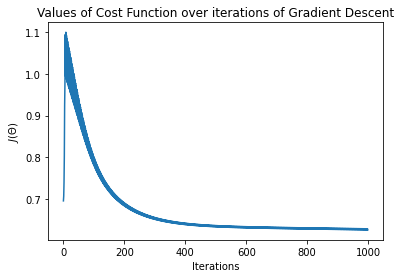

In [12]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent")